1.Loading the Dataset:

In [32]:
import pandas as pd

path = r'C:\Users\arvind_kumar21\Documents\Arvind_Backup\AI_ML_RACE\AI06_TRIM02_Module05_NLP\Final Exam\data_set.csv'
df = pd.read_csv(path)


2. Text Preprocessing:

Using nltk and spaCy, we can tokenize, remove stopwords, and lemmatize the data.

In [13]:
import nltk
nltk.set_proxy('http://your_proxy:your_port')


In [53]:
df=df.dropna()
df.head(5)

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded,Salary_Percentile,salary1
2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195,0.495304,low
3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313,0.277522,low
6,13-15 yrs,- Experience in managing fraud analytics with ...,Associate Vice President - Fraud Analytics - S...,Analytics,"Fraud Analytics, People Management Skills, Tea...",Delhi NCR,25to50,1988,0.639228,low
11,10-12 yrs,- Experience in Credit card/ banking domain wi...,Senior AVP - Model Development - Bank - IIM/ M...,Analytics,"Banking, Model Development, Analytics, People ...","Delhi NCR, Gurgaon",10to15,1969,0.277522,low
12,2-6 yrs,3+ years of software development experience;Le...,Sales and Marketing Data Analyst - Data Analytics,Analytics,"Marketing Automation, Sales, Salesforce, Eloqu...",Pune(Kharadi),10to15,3692,0.277522,low


In [107]:
def extract_experience(exp_str):
    # Split by '-'
    parts = exp_str.split('-')
    
    if len(parts) == 1:  # Single year format
        return int(parts[0].strip().split()[0])
    else:  # Range format
        lower = int(parts[0].strip())
        upper = int(parts[1].strip().split()[0])
        
        # Return average of range
        return (lower + upper) // 2

df['experience'] = df['experience'].apply(extract_experience)


In [108]:
df

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded,Salary_Percentile,salary1,combined_text
2,7,must effective communicator ( write & speak ) ...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics , Employee Engagement , training ...",Delhi NCR,15to25,4195,0.373022,low,must effective communicator ( write & speak ) ...
3,8,7 - 10 year overall experience datum engineer ...,Associate Manager Data Engineering,Analytics,"SQL , Javascript , Automation , Python , Ruby ...",Bengaluru,10to15,313,0.142412,low,7 - 10 year overall experience datum engineer ...
6,14,- experience managing fraud analytic knowledge...,Associate Vice President - Fraud Analytics - S...,Analytics,"Fraud Analytics , People Management Skills , T...",Delhi NCR,25to50,1988,0.573411,low,- experience managing fraud analytic knowledge...
11,11,- experience Credit card/ banking domain knowl...,Senior AVP - Model Development - Bank - IIM/ M...,Analytics,"banking , Model Development , Analytics , Peop...","Delhi NCR, Gurgaon",10to15,1969,0.142412,low,- experience Credit card/ banking domain knowl...
12,4,3 + year software development experience ; lev...,Sales and Marketing Data Analyst - Data Analytics,Analytics,"Marketing Automation , Sales , Salesforce , El...",Pune(Kharadi),10to15,3692,0.142412,low,3 + year software development experience ; lev...
...,...,...,...,...,...,...,...,...,...,...,...
19766,9,- proficient translate unstructured business p...,Data Scientist - IT Services Firm,analytics,"r , big datum analytic , predictive modeling ,...",Mumbai,15to25,4301,0.373022,low,- proficient translate unstructured business p...
19768,5,candidate good knowledge VBA/ excel ; good kno...,Sr. Analyst - Data Analytics & Reporting - VBA...,Analytics,"Data Analytics , Data Analysis , Advanced Anal...",Bengaluru,10to15,2718,0.142412,low,candidate good knowledge VBA/ excel ; good kno...
19777,10,"- applicant good understanding reporting , dat...",Senior Manager - Reporting/analytics & Busines...,analytics,"sale enablement , mis , business operation , b...",Bengaluru,25to50,1893,0.573411,low,"- applicant good understanding reporting , dat..."
19793,5,program knowledge ( Python / Java ) good under...,SDET - Selenium Webdriver & (python/java),Analytics,"java , selenium webdriver , sdet , python , co...",Chennai,10to15,1727,0.142412,low,program knowledge ( Python / Java ) good under...


In [109]:
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize




In [110]:
# Define stop words and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


text =df['job_description']

text

2        must effective communicator ( write & speak ) ...
3        7 - 10 year overall experience datum engineer ...
6        - experience managing fraud analytic knowledge...
11       - experience Credit card/ banking domain knowl...
12       3 + year software development experience ; lev...
                               ...                        
19766    - proficient translate unstructured business p...
19768    candidate good knowledge VBA/ excel ; good kno...
19777    - applicant good understanding reporting , dat...
19793    program knowledge ( Python / Java ) good under...
19794    sell saas security solution SOAR space atleast...
Name: job_description, Length: 3855, dtype: object

# Q1

Q1
Text Preprocessing and Feature Extraction: 
•	Implement text preprocessing techniques (e.g., tokenization, stop word removal, and stemming/lemmatization) on the job_description and key_skills columns.


In [111]:
# Load spaCy's English NLP model
nlp = spacy.load("en_core_web_sm")

# Define stop words
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Stopword Removal
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Lemmatization
    lemmatized_tokens = []
    doc = nlp(" ".join(tokens))
    for token in doc:
        lemmatized_tokens.append(token.lemma_)
    
    return " ".join(lemmatized_tokens)

# Apply preprocessing to the columns
df['job_description'] = df['job_description'].apply(preprocess)
df['key_skills'] = df['key_skills'].apply(preprocess)



In [112]:
df['key_skills'] 

2        HR Analytics , Employee Engagement , training ...
3        SQL , Javascript , Automation , Python , Ruby ...
6        Fraud Analytics , People Management Skills , T...
11       banking , Model Development , Analytics , Peop...
12       Marketing Automation , Sales , Salesforce , El...
                               ...                        
19766    r , big datum analytic , predictive modeling ,...
19768    Data Analytics , Data Analysis , Advanced Anal...
19777    sale enablement , mis , business operation , b...
19793    java , selenium webdriver , sdet , python , co...
19794    Security Analytics , SIEM , Arcsight , QRadar ...
Name: key_skills, Length: 3855, dtype: object

In [113]:
df['job_description']

2        must effective communicator ( write & speak ) ...
3        7 - 10 year overall experience datum engineer ...
6        - experience manage fraud analytic knowledge a...
11       - experience credit card/ banking domain knowl...
12       3 + year software development experience ; lev...
                               ...                        
19766    - proficient translate unstructured business p...
19768    candidate good knowledge VBA/ excel ; good kno...
19777    - applicant good understanding reporting , dat...
19793    program knowledge ( Python / Java ) good under...
19794    sell saas security solution SOAR space atleast...
Name: job_description, Length: 3855, dtype: object

•	Extract relevant features from the text data for model training, such as TF-IDF or word embeddings. How can these features improve the prediction of salary?

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine job_description and key_skills for better feature representation
df['combined_text'] = df['job_description'] + " " + df['key_skills']

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # considering top 5000 features
tfidf_matrix = vectorizer.fit_transform(df['combined_text'])


In [115]:
print("Values of the tfidf_matrix for the first 5 records:")
print(tfidf_matrix.todense()[:5])  # Print the values for the first 5 records



Values of the tfidf_matrix for the first 5 records:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [121]:
def get_average_word_vector(text, model=nlp, vector_size=300):
    # Tokenize the text and filter out tokens that don't have a vector
    doc = model(text)
    vectors = [token.vector for token in doc if token.has_vector]
    
    # If no tokens have vectors, return a zero vector
    if len(vectors) == 0:
        return [0] * vector_size
    
    # Average the vectors
    return sum(vectors) / len(vectors)

df['embedding_vector'] = df['combined_text'].apply(lambda x: get_average_word_vector(x))


In [116]:
# Convert string value in experience to float

# Q4
Skill Requirements:
•	Investigate the significance of key skills (from the 'key_skills' column) in determining salary levels. Identify the most influential skills and their effect on salary predictions.


In [185]:
import pandas as pd

path = r'C:\Users\arvind_kumar21\Documents\Arvind_Backup\AI_ML_RACE\AI06_TRIM02_Module05_NLP\Final Exam\data_set.csv'
df = pd.read_csv(path)

In [186]:
df.head(2)

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458


In [187]:
df['key_skills'] = df['key_skills'].fillna('missing')


In [188]:
def extract_experience(exp_str):
    # Split by '-'
    parts = exp_str.split('-')
    
    if len(parts) == 1:  # Single year format
        return int(parts[0].strip().split()[0])
    else:  # Range format
        lower = int(parts[0].strip())
        upper = int(parts[1].strip().split()[0])
        
        # Return average of range
        return (lower + upper) // 2

df['experience'] = df['experience'].apply(extract_experience)


In [ ]:
# Convert salary into numeric values

In [189]:
def extract_experience(exp_str):
    # Split by '-'
    parts = exp_str.split('to')
    
    if len(parts) == 1:  # Single year format
        return int(parts[0].strip().split()[0])
    else:  # Range format
        lower = int(parts[0].strip())
        upper = int(parts[1].strip().split()[0])
        
        # Return average of range
        return (lower + upper) // 2

df['salary'] = df['salary'].apply(extract_experience)


In [190]:
df.head(10)

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,6,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),8,3687
1,13,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,12,458
2,7,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,20,4195
3,8,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,12,313
4,2,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,4,1305
5,7,4.\tWillingness to travel;5.\tExperience in Te...,Senior Trainer- Academics,NaN,"academics, effective communication, teacher tr...",Noida,8,4428
6,14,- Experience in managing fraud analytics with ...,Associate Vice President - Fraud Analytics - S...,Analytics,"Fraud Analytics, People Management Skills, Tea...",Delhi NCR,37,1988
7,8,Qualified Chartered Accountant with 1-3 yrs of...,Manager - Internal Audit - CA - Big4,NaN,"Accounting, Internal Audit, Auditing, Enterpri...",Pune,8,1793
8,2,Proven experience as payroll executive or spec...,Payroll Executive,NaN,"esic, hr, bonus, pf, tds, payroll, superannuat...",Ahmedabad(Bodakdev),1,3398
9,4,Other activities as may be required over the p...,Required CA (manager Finance) for R&R Salons P...,NaN,"accounting standards, finance, auditing, finan...",Bengaluru(Kodihalli),20,3444


In [191]:
# Text preprocessing
df['key_skills'] = df['key_skills'].str.lower().str.replace('[^\w\s]', '')


In [192]:
#One-Hot Encoding:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
skills_matrix = vectorizer.fit_transform(df['key_skills'])
skills_df = pd.DataFrame(skills_matrix.toarray(), columns=vectorizer.get_feature_names_out())



C:\Users\arvind_kumar21\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [193]:
#Correlation Analysis:
correlations = {}
for column in skills_df:
    correlations[column] = df['salary'].corr(skills_df[column])

sorted_skills = sorted(correlations.items(), key=lambda x: x[1], reverse=True)


In [194]:
#Insights:
top_skills = sorted_skills[:10]  # adjust as needed
print(top_skills)


[('r', 0.11382664225405606), ('sas', 0.09913133033121527), ('data science', 0.08890494829328592), ('machine learning', 0.08819917758280758), ('insurance analytics', 0.07832334976890044), ('anova', 0.07089693834539378), ('analytics head', 0.07054876218358516), ('java', 0.07041293707544488), ('spark', 0.06904764515153843), ('team leading', 0.0680629048598356)]


# Q3
Job Location Impact:
•	Analyze the impact of job location (from the 'location' column) on salary predictions. Are there specific locations associated with higher or lower salaries? Use NLP techniques to uncover location-related insights.

In [195]:
#Group by Location and Compute Mean Salary:
location_salary = df.groupby('location')['salary'].mean().sort_values(ascending=False)

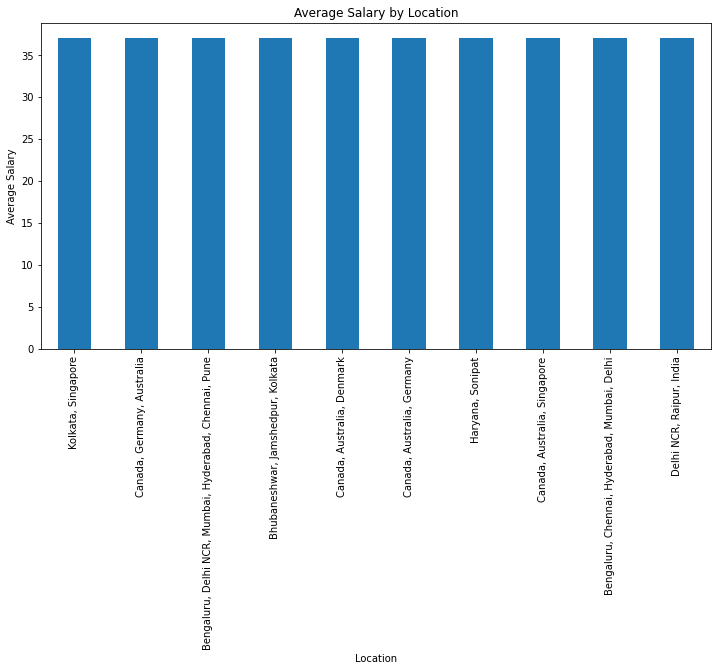

In [196]:
import matplotlib.pyplot as plt

top_locations = location_salary.head(10)  # Considering top 10 locations by average salary
top_locations.plot(kind='bar', figsize=(12, 6))

plt.title('Average Salary by Location')
plt.ylabel('Average Salary')
plt.xlabel('Location')
plt.show()

# Q2
•	Build a predictive model to estimate the salary based on the provided features (excluding salary itself). Choose an appropriate algorithm and evaluate the model's performance using regression metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). How well does the model perform?

In [203]:
X = df[['experience']]
y = df['salary']


In [204]:
from sklearn.preprocessing import LabelEncoder

In [205]:
le = LabelEncoder()
labels = df['experience']
encoded_labels = le.fit_transform(labels)
print(encoded_labels)

[ 6 13  7 ... 10  2  3]


In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [207]:
# Prediction using Rando Forest
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [208]:
y_pred = regressor.predict(X_test)


In [209]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 5.378112249975168
Root Mean Squared Error: 7.330225211111669


In [210]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [211]:
y_pred = model.predict(X_test)


In [212]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 5.430065237723226
Root Mean Squared Error: 7.405157295348543


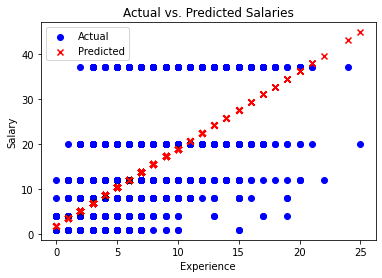

In [213]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', marker='x', label='Predicted')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Actual vs. Predicted Salaries')
plt.legend()
plt.show()
